## 선형 회귀 예제

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측 예제

### 사용 데이터 
- Boston Housing Price (보스턴 주택 가격 데이터)
- 사이킷런 1.0 대 버전에서만 제공 (1.2 버전 이후 제공되지 않음)

---
- 보스턴 시의 주택 가격에 대한 데이터
    - 주택의 여러가진 요건들과 주택의 가격 정보 포함
    - 주택의 가격에 영향을 미치는 요소 분석
- 데이터 수 : 506 개
- 피처 개수 :  14 개


In [1]:
import sklearn
sklearn.__version__

'1.2.1'

피처 설명  
- CRIM: 지역별 범죄 발생률. 1인당 범죄율  
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율  
- INDUS: 비상업지역이 점유하고 있는 토지의 비율(넓이 비율)  
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  
- NOX: 일산화질소 농도  
- RM: 주택 1가구당 평균 방의 개수  
- AGE: 1940년 이전에 건축된 소유주택의 비율  
- DIS: 5개 주요 고용센터까지의 가중 거리(접근성 지수)  
- RAD: 고속도로 접근 용이도(접근성 지수)  
- TAX: 10,000달러당 재산세율  
- PTRATIO: 자치시(town)별 학생/교사 비율  
- B: 자치시별 흑인 거주 비율  
- LSTAT: 하위 계층의 비율  
- MEDV: 본인 소유의 주택 가격(중앙값) (단위: $1,000)  

### 보스턴 주택 가격 예측 모델 생성  
- 사용 데이터 세트 : 보스턴 주택 가격 데이터 세트  
- 데이터 준비 : 피처 데이터 / 레이블 데이터  
- 데이터 세트 분리 : 학습 / 테스트 데이터 세트   
    - train_test_split() 이용  
- 사용 알고리즘(모델) : LinearRegression  
- 모델 학습 및 예측 수행 : fit() / predict()  
- 모델 평가  
    - MSE 측정 : metrics 모듈의 mean_squared_error() 이용   
    - RMSE 측정 : 사이킷런이 지원하지 않기 때문에 np.sqrt() 이용  
    - R2 Score 측정 : r2_score() 이용    
- 교차 검증 수행  

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

boston_df = df_pop = pd.read_csv('../../data/boston_dataset.csv', index_col=0) 
boston_df.head()
boston_df.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


집 값에 크게 영향을 미치는 중요한 요소 추청  
- 삶의 편의성을 생각하면 : RM (거주할 수 있는 방 개수)
- RAD : 고속도로 접근 용이도 (미국은 차가 있어야 하니까)

각 피처별로 주택 가격에 미치는 영향도를 조사  
총 8개의 피처에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인

Seaborn의 regplot() 이용  
- 각 ax마다 피처와 PRICE의 관계 표현  
- 2차원 평면에서 X축을 피처, Y축을 타깃값으로 설정하면  
- 산점도와 함께 선형 회귀 직선표시  

### 집 값에 영향을 미치는 피처 확인 

In [ ]:
# 피처 선택

# 방의 개수
# 25,000평방피트를 초과하는 거주 지역의 비율 
# 비상업지역이 점유하고 있는 토지의 비율(넓이 비율)
# 일산화질소 농도
# 1940년 이전에 건축된 소유 주택의 비율
# 학생/교사 비율
# 하위 계층의 비율
# 고속도로 접근 용이도

# 선택한 피처들만 포함시켜서 
# sns.regplot()사용하여
# 2행 4열로 시각화

<Figure size 800x400 with 0 Axes>

<Axes: >

<Axes: xlabel='RM', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='ZN', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='INDUS', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='NOX', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='AGE', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='PTRATIO', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='LSTAT', ylabel='PRICE'>

<Axes: >

<Axes: xlabel='RAD', ylabel='PRICE'>

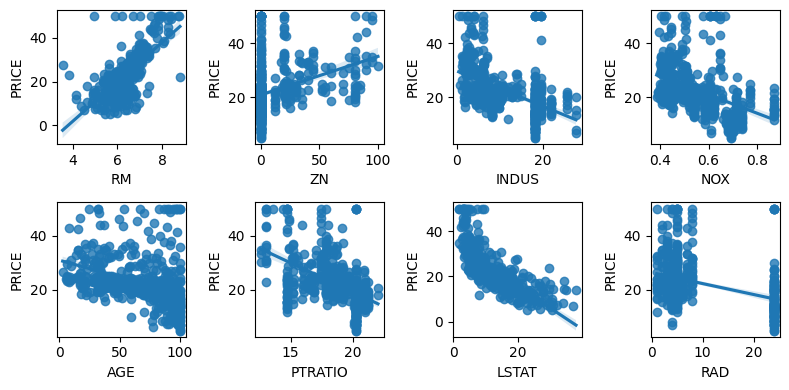

In [20]:
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

plt.figure(figsize=(8,4))
for i, feature in enumerate(features):
    plt.subplot(2,4,i+1)
    sns.regplot(x=feature, y='PRICE', data=boston_df)
    
plt.tight_layout()
plt.show()

In [15]:
# 결과
# 기울기
# PRICE에 가장 영향을 많이 끼치는 feature : RM(방의 개수), LSTAT(하위계층)
# RM : 양의 방향 - 방개수 증가 -> 가격 증가
# LSTAT : 음의 방향

### 데이터 준비 

In [22]:
# target 값 데이터 세트
# label처럼 0,1로 분류되지 않아도 괜찮음
y_target = boston_df['PRICE']


# feature값 데이터 세트
X_data = boston_df.drop('PRICE', axis=1)

### 데이터 세트 분리

In [23]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_data ,
                                                       y_target ,
                                                       test_size=0.3, 
                                                       random_state=156)

### 예측 모델 생성 

In [25]:
# 예측 모델 생성
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train) # 학습
y_pred = lr_reg.predict(X_test) # 예측

LinearRegression()

### 모델 평가

In [33]:
# 모델 평가 : MSE / RMSE / R 제곱

from sklearn.metrics import mean_squared_error, r2_score

# mse값 : mean_squared_error(실제값, 예측값) 사용 -> 예측 오류값 
mse = mean_squared_error(y_test, y_pred)

# rmse : 사이킷런에서는 rmse지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)

# r제곱 : r2_score(실제값, 예측값)
r2 = r2_score(y_test, y_pred)


# 평가 지표 출력
print('MSE : {0:.3f}, RMSE :{1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2))

# 결과
# 평가 : RMSE와 R제곱 지표 확인
# RMSE :  4.159
# R제곱 :  0.757

# RMSE 는 낮을수록 성능이 좋고
# R제곱은 1에 가까울수록 좋은 수치임

# 따라서 현재 예측 모델은
# 나쁜 수치는 아니지만 만족할만한 수치도 아님

MSE : 17.297, RMSE :4.159
R제곱 : 0.757


In [34]:
# 실제값 예측값 비교
y_test.mean() # 실제값 평균
y_pred.mean() # 예측값 평균

21.654605263157894

23.047517912319616

In [56]:
# 절편과 회귀 계수값 확인
print('절편 값 :', lr_reg.intercept_)
print('회귀 계수 값 :', lr_reg.coef_)

절편 값 : 40.9955951721644
회귀 계수 값 : [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


In [58]:
# coef_ 속성은 회귀 계수 값만 가지고 있으므로
# 회귀 계수값을 피처별로 매칭시키고
# 내림차순 정렬해서 확인
from pandas import Series
f_imp = Series(data= lr_reg.coef_, index=boston_df.columns[:-1]).sort_values(ascending=False)
f_imp

# 결과
# RM이 회귀계수 3.4로 가장 큼
# 특이사항 : NOX피처의 회귀계수가 -19.8로 너무 큼
# -NOX값 때문에 예측 오류값이 달라질 수 있음
# 최적화 수행하면서 피처의 회귀계수 변화도 같이 살펴볼 예정

RM          3.354969
CHAS        3.045898
RAD         0.355884
ZN          0.065512
INDUS       0.034437
B           0.010397
AGE         0.005937
TAX        -0.014295
CRIM       -0.112980
LSTAT      -0.566182
PTRATIO    -0.920180
DIS        -1.741854
NOX       -19.795832
dtype: float64

### 교차 검증 수행

교차 검증 수행
- 5개의 폴드 세트에서 corss_val_score()를 이용해 교차 검증 수행     
- MSE와 RMSE 측정  
- corss_val_score()에서는 RMSE를 제공하지 않음    
    - MSE 수치 결과를 RMSE로 변환 작업 필요     

MSE 구하는 방법      
- MSE 값을 반환받기 위해 매개변수 scoring='neg_mean_squared_error' 설정  
    - 주의!!  
    - 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데      
        - 예: 정확도, f1, recall, precision, roc_auc   
    - MSE는 낮을수록 좋은 회귀 모델  
        - 그래서 scoring='neg_mean_squared_error'로 사이킷런의 scoring 함수를 호출하면  
        - MSE 값에 -1을 곱해서 반환됨(반환값이 minus다!)   
        - 따라서 MSE값 쓰려면
        - corss_val_score()에서 반환된 값에 다시 -1을 곱해야   
            - 양의 값인 원래 모델에서 계산된 MSE 값이 됨  
- 결론 :  
    - scoring='neg_mean_squared_error' 설정  
    - **반환된 값에 -1 곱해서 양의 값으로 변환해서 사용**

RMSE 구하는 방법  
- 사이킷런에서 RMSE는 제공하지 않으므로  
- MSE 수치 결과를 RMSE로 변환할 필요  
- 변환된 MSE 값에 넘파이 sqrt() 함수를 적용해서 구함  


In [66]:
# 5개의 fold세트에서 교차 검증 수행
# MSE와 RMSE 측정
from sklearn.model_selection import cross_val_score

# 5개 Fold set으로 MSE 구함
neg_mse_scores = cross_val_score(lr_reg,
                                X_data, y_target, 
                                scoring='neg_mean_squared_error',
                                cv=5)

# neg_mse_scores가 음수값으로 반환되므로 -1 곲해서 사용
# RMSE는 np.sqrt() 사용
rmse_scores = np.sqrt(-1 * neg_mse_scores) # 제곱근
avg_rmse = np.mean(rmse_scores) # 평균

# 평가 지표 출력
print('5 Folds 교차 검증 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 Folds 교차 검증 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 Folds 교차 검증 평균 RMSE : ', np.round(avg_rmse, 3))

# 결과
# 교차 검증 전 RMSE : 4.159
# 교차 검증 후 RMSE : 5.829

# 좀 더 정확한 평가를 위해서 교차 검증을 수행했는데
# RMSE값이 약간 더 높게 나타남
# 만족할 만한 수치는 아님

# 데이터 부족이 가장 큰 문제인듯 (테스트용, 검증용 데이터 부족)
# 좀 더 충분한 데이터가 있어야 할 듯

5 Folds 교차 검증 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 Folds 교차 검증 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 Folds 교차 검증 평균 RMSE :  5.829


### LinearRegression 하이퍼 파라미터 튜닝
- LinearRegression 모델은 파라미터가 몇 개 없기 때문에
- 하이퍼 파라미터 튜닝은 거의 수행하지 않음
- 하이퍼 파라미터 튜닝을 적용하려면 릿리, 라쏘, 엘라스틱 넷을 사용   

회귀분석에서 스케일링
- tree기반 알고리즘은 영향을 덜 받아서 수행하지 않아도 괜찮은데
- 로지스틱 회귀는 회귀를 기반으로 하고 있기 때문에
- **피쳐데이터: 표준 스케일링**
- **target :  로그 변환**
- 한 후에 모델링 !!


In [67]:
# 선형 회귀 계열의  로지스틱 회귀는
# 데이터의  정규 분포에 따라
# 예측 성능에 영향을 받을 수 있으므로
# 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤
# 학습/테스트 데이터 세트로 분리

### 스케일링 수행 후 데이터 세트 분리하고 모델링 수행 

In [87]:
from sklearn.preprocessing import StandardScaler

# 피처데이터 표준 스케일링 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_data)

# target값 로그 변환
target_scaled = np.log1p(y_target)

# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled,
                                                    target_scaled,
                                                    test_size=0.3, 
                                                    random_state=156)


In [88]:
# 예측 모델 생성
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train) # 학습
y_pred = lr_reg.predict(X_test) # 예측

LinearRegression()

In [89]:
# 모델 평가 : MSE / RMSE / R 제곱

from sklearn.metrics import mean_squared_error, r2_score

# mse값 : mean_squared_error(실제값, 예측값) 사용 -> 예측 오류값 
mse = mean_squared_error(y_test, y_pred)

# rmse : 사이킷런에서는 rmse지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)

# r제곱 : r2_score(실제값, 예측값)
r2 = r2_score(y_test, y_pred)


# 평가 지표 출력
print('MSE : {0:.3f}, RMSE :{1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2))


# MSE : 0.031, RMSE :0.176
# R제곱 : 0.794

MSE : 0.031, RMSE :0.176
R제곱 : 0.794
